In [48]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pickle
import os
from mutation import *
from crossover import *
from rmp import *
from mfea import *
from task import *
from llm import *
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
gnbg_tasks = []
gnbg_tasks.append(GNBGTask(1, 100))
gnbg_tasks.append(GNBGTask(2, 100))
gnbg_tasks.append(GNBGTask(3, 100))
gnbg_tasks.append(GNBGTask(4, 100))
gnbg_tasks.append(GNBGTask(5, 100))
gnbg_tasks.append(GNBGTask(6, 100))

In [50]:

API_KEY = os.getenv("DEEPSEEK_API_KEY")
print(API_KEY)


sk-505a4ff57cfb432d8888a3d8d66a3133


In [51]:
num_indis_per_task = 100
indi_len = 30
bound = 100
crossover = BLXCrossover()
mutation = PolynomialMutation(20)
rmp = NormalRMP(0.3)

amfea = AMFEA(num_indis_per_task, indi_len, gnbg_tasks, crossover, mutation, rmp)

Initialization:
Task 0:
Best Fitness: 89672.91238526908
Mean Fitness: 177354.47092346053

Task 1:
Best Fitness: -701.3866075417664
Mean Fitness: -701.310943993558

Task 2:
Best Fitness: 38747847618.83141
Mean Fitness: 93071728120.38055

Task 3:
Best Fitness: 410534.65715594345
Mean Fitness: 920790.6031041741

Task 4:
Best Fitness: -334.1131677939574
Mean Fitness: -333.9971863774097

Task 5:
Best Fitness: -183.49018405197518
Mean Fitness: -183.3473880141399



In [ ]:
bfs, mfs = amfea.fit(1, monitor=True, monitor_rate=500)

Gen 0
Task 0, Best: 89672.91238526908, Avg: 171755.00252698548
Task 1, Best: -701.3866075417664, Avg: -701.3122048966526
Task 2, Best: 38747847618.83141, Avg: 92024126993.60849
Task 3, Best: 410534.65715594345, Avg: 907240.198798304
Task 4, Best: -334.1131677939574, Avg: -334.00130826970417
Task 5, Best: -183.49018405197518, Avg: -183.3530643983958
Time taken each gen: 0.0051 seconds



In [34]:
for task in gnbg_tasks:
    print(task.gnbg.OptimumValue)

-1081.9837994003399
-703.1328146165181
-357.5797495903721
-382.6205211774271
-337.50899809752036
-186.86405320391498


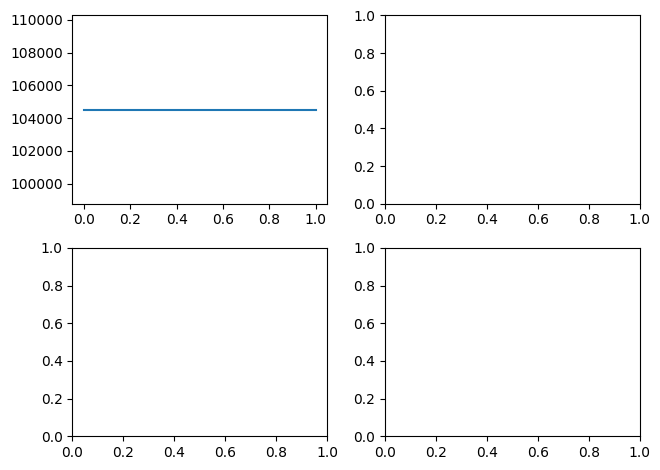

In [41]:
fig, axes = plt.subplots(2, 2)
fig.tight_layout()
axes[0, 0].plot(bfs[0])

In [ ]:
with open('student_file.pkl', 'rb') as f:
    student_names_loaded = pickle.load(f) # deserialize using load()
    print(student_names_loaded) # print student names

In [47]:
x = np.array([[1, 2], [3, 4]])
y = np.array([[1, 1], [1, 2]])
y @ x.T

array([[ 3,  7],
       [ 5, 11]])